In [1]:
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


# <span style='color:Yellow'> Task 5. Prior predictive checks </span>

### <span style='color:Red'> Modifying prior </span>

In [3]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

weight = d['weight']
mean_weight = weight.mean()
c_weight = weight-mean_weight
d['c_weight'] = c_weight

R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [4]:
df = sim.draws_pd()
df

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,232.163,0.777181,23.208300,224.307,189.606,228.071,250.685,275.945,...,268.583,285.802,278.3380,249.1490,211.536,231.631,238.3190,262.867,252.269,261.092
1,0.0,0.0,154.022,-0.006780,0.086958,154.222,154.178,154.171,154.205,154.204,...,154.172,153.933,153.8520,153.9120,153.839,153.962,153.8220,153.900,154.017,153.893
2,0.0,0.0,169.461,-1.138640,20.358900,214.148,180.736,180.563,195.404,190.363,...,191.242,127.912,184.9650,160.2570,192.539,152.132,171.4460,159.588,148.893,153.309
3,0.0,0.0,158.357,-0.254452,6.415610,170.426,157.500,160.170,155.285,159.820,...,158.852,156.096,157.4510,163.9770,151.784,151.365,160.0010,151.036,156.545,151.490
4,0.0,0.0,158.131,1.671020,9.955320,108.885,130.072,129.245,130.434,152.113,...,194.067,192.554,173.3180,183.4590,181.401,179.371,179.6590,193.581,192.853,180.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,161.753,1.261300,6.017940,150.133,135.414,146.446,146.846,148.854,...,180.654,163.295,183.9520,177.6080,196.380,179.578,181.8730,195.683,181.097,178.390
996,0.0,0.0,196.362,1.223380,10.413300,186.314,186.621,176.581,183.650,168.386,...,206.321,217.850,218.2430,195.7830,223.757,210.757,194.7030,230.771,214.170,216.410
997,0.0,0.0,172.792,-0.272051,76.805200,139.163,272.530,237.396,184.075,199.179,...,119.115,136.265,215.0740,30.6534,177.662,232.106,81.1819,190.654,107.253,130.593
998,0.0,0.0,126.115,0.987160,23.204300,133.109,118.597,109.399,127.169,144.429,...,131.347,134.017,95.5687,120.2340,166.454,136.280,168.7340,117.519,111.263,148.882


### <span style='color:Red'> Plot lines for each sampled slope beta and intercept alpha. </span>

Min:  152.1429
Max:  203.609


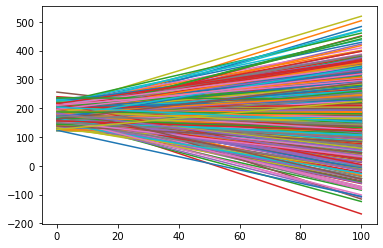

In [5]:
x = np.array([0,100])

for i in range(len(df)):
    y = df['beta'][i]*x + df['alpha'][i]
    plt.plot(x, y)

print('Min: ', np.min(y))
print('Max: ', np.max(y))
    

### <span style='color:Red'> For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). </span>

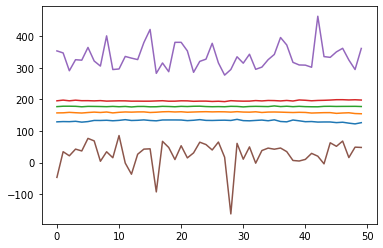

In [14]:
max = []
min = []
height = sim.stan_variable('height')
quantiles = {}
quantiles['q1'] = []
quantiles['q2'] = []
quantiles['q3'] = []
quantiles['q4'] = []
quantiles['q5'] = []

for i in range(height.shape[1]):
    heights = height[:,i] 
    max.append(np.max(heights))
    min.append(np.min(heights))
    quantiles['q1'].append(np.quantile(heights, 0.05))
    quantiles['q2'].append(np.quantile(heights, 0.25))
    quantiles['q3'].append(np.quantile(heights, 0.5))
    quantiles['q4'].append(np.quantile(heights, 0.75))
    quantiles['q5'].append(np.quantile(heights, 0.95))

for i in range(1,len(quantiles.keys())):
    plt.plot(quantiles['q'+str(i)])

plt.plot(max)
plt.plot(min)
plt.show()